In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
#creating dataframe 
data = pd.DataFrame(data = df['data'], columns = df['feature_names'])

In [6]:
#adding housing value to the dataframe
data['Value'] = df['target']

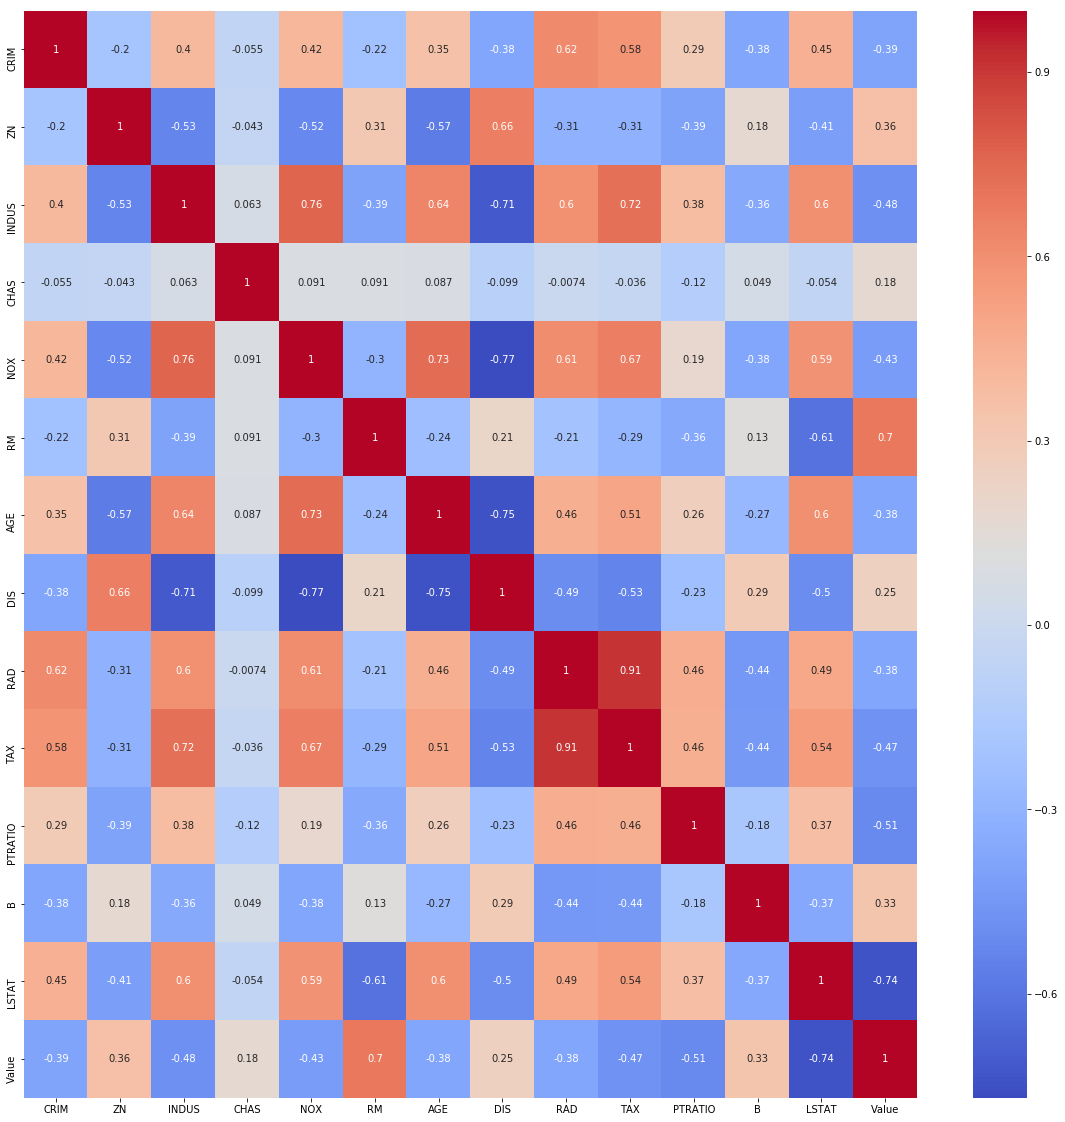

In [7]:
#creating heatmap
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


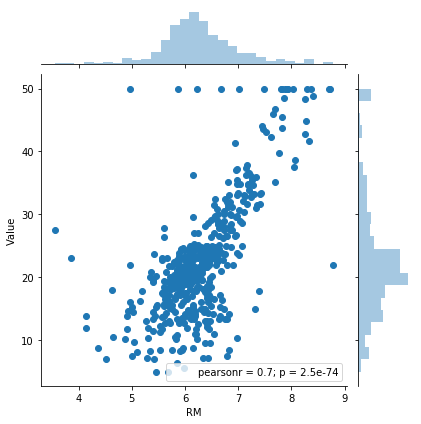

In [8]:
#EDA
sns.jointplot('RM', 'Value', data = data)

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


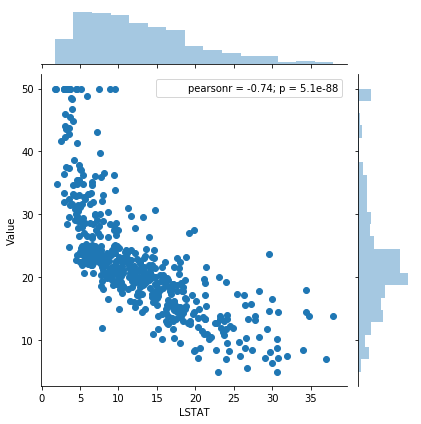

In [9]:
#EDA
sns.jointplot('LSTAT', 'Value', data = data)

In [214]:
#split test and train data
X = data[['RM', 'LSTAT']]
Y = data['Value']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 100)

In [215]:
#model fit and predictions
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
test_predictions = lm.predict(x_test)
train_predictions = lm.predict(x_train)

In [216]:
#metrics of the model
from sklearn import metrics
#train metrics
Train1_MSE = metrics.mean_squared_error(y_train, train_predictions)
Train1_RMSE = np.sqrt(Train_MSE)
#test metrics
Test1_MSE = metrics.mean_squared_error(y_test, test_predictions)
Test1_RMSE = np.sqrt(Test1_MSE)
RS = metrics.explained_variance_score(y_test, test_predictions)
print('Train MSE:', Train1_MSE)
print('Train RMSE', Train1_RMSE)
print("")
print('Test MSE:', Test1_MSE)
print('Test RMSE', Test1_RMSE)
print('R^2', RS)

Train MSE: 27.50427134521369
Train RMSE 4.888219004816079

Test MSE: 38.397433181299625
Test RMSE 6.196566241177417
R^2 0.620898499608393


Text(0.5,1,'Residual Distribution')

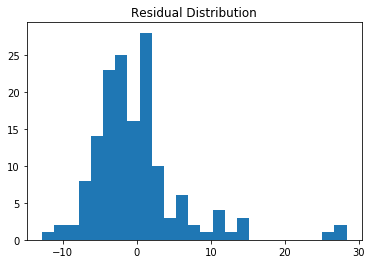

In [140]:
fig, ax = plt.subplots(1,1)
ax.hist(y_test - test_predictions, bins = 25)
ax.set_title('Residual Distribution')

In [176]:
#model coefficents
coeff = lm.coef_
intercept = lm.intercept_
table = np.append(intercept, coeff)
coeff_df = pd.DataFrame(data = table, index = ['Intercept','RM', 'LSTAT'], columns = ['Coeff'])
coeff_df

,Coeff
Intercept,-0.672662
RM,4.872527
LSTAT,-0.585853


In [177]:
#F-stat
meanY = np.mean(data['Value'])
def TSS(x):
    a = (x - meanY)**2
    return a
TSS = sum(data['Value'].apply(lambda x: TSS(x)))

Yi = np.array(y_test)
Yhat = np.array(test_predictions)
RSS = sum((Yi-Yhat)**2)
RSS
Fstat = ((TSS-RSS)/2)/(RSS/(355-2-1))

In [178]:
Fstat

1112.1322927213932

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


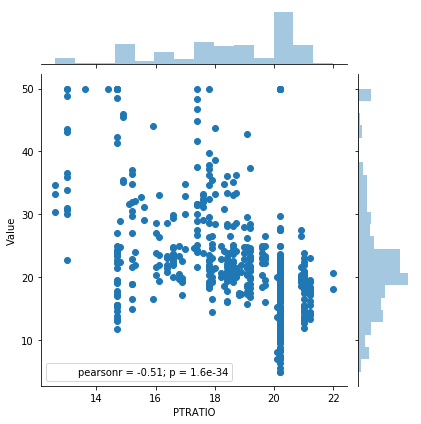

In [50]:
sns.jointplot(x = 'PTRATIO', y = 'Value', data=data)

In [217]:
#Tuning the model by adding PTRATIO
X = data[['RM', 'LSTAT', 'PTRATIO']]
Y = data['Value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 100 )
lm2 = LinearRegression()
lm2.fit(x_train, y_train)
train_predictions = lm2.predict(x_train)
test_predictions = lm2.predict(x_test)

In [218]:
#train metrics
Train2_MSE = metrics.mean_squared_error(y_train, train_predictions)
Train2_RMSE = np.sqrt(Train2_MSE)
#test metrics
Test2_MSE = metrics.mean_squared_error(y_test, test_predictions)
Test2_RMSE = np.sqrt(Test2_MSE)
RS = metrics.explained_variance_score(y_test, test_predictions)
print('Train MSE:', Train2_MSE)
print('Train RMSE', Train2_RMSE)
print("")
print('Test MSE:', Test2_MSE)
print('Test RMSE', Test2_RMSE)
print('R^2', RS)

Train MSE: 23.8946850390451
Train RMSE 4.888219004816079

Test MSE: 35.240356121961725
Test RMSE 5.9363588269209036
R^2 0.6521459474656122


In [223]:
#Tuning the model by adding INDUS
X = data[['RM', 'LSTAT', 'PTRATIO', 'INDUS']]
Y = data['Value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 100 )
lm2 = LinearRegression()
lm2.fit(x_train, y_train)
train_predictions = lm2.predict(x_train)
test_predictions = lm2.predict(x_test)

In [224]:
#train metrics
Train3_MSE = metrics.mean_squared_error(y_train, train_predictions)
Train3_RMSE = np.sqrt(Train3_MSE)
#test metrics
Test3_MSE = metrics.mean_squared_error(y_test, test_predictions)
Test3_RMSE = np.sqrt(Test3_MSE)
RS = metrics.explained_variance_score(y_test, test_predictions)
print('Train MSE:', Train3_MSE)
print('Train RMSE', Train3_RMSE)
print("")
print('Test MSE:', Test3_MSE)
print('Test RMSE', Test3_RMSE)
print('R^2', RS)

Train MSE: 23.834470840150846
Train RMSE 4.882056005429561

Test MSE: 35.63392024412716
Test RMSE 5.969415402208759
R^2 0.6482182488445766


Text(0.5,1,'Comparison of RMSE')

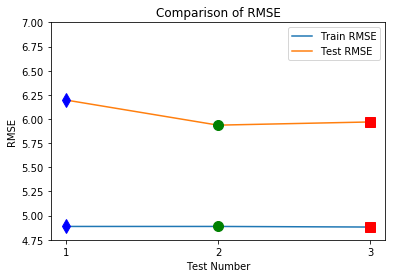

In [259]:
x = (1,2,3)
y1 = (Train1_RMSE, Train2_RMSE, Train3_RMSE)
y2 = (Test1_RMSE, Test2_RMSE, Test3_RMSE)
fig, ax = plt.subplots(1,1)
ax.plot(x, y1, label = 'Train RMSE')
ax.plot(x, y2, label = 'Test RMSE')
ax.plot(1, Train1_RMSE, marker = 'd', markersize = 10, c = 'b')
ax.plot(1, Test1_RMSE, marker = 'd', markersize = 10, c = 'b')
ax.plot(2, Train2_RMSE, marker = 'o', markersize = 10, c = 'g')
ax.plot(2, Test2_RMSE, marker = 'o', markersize = 10, c = 'g')
ax.plot(3, Test3_RMSE, marker = 's', markersize = 10, c = 'r')
ax.plot(3,Train3_RMSE, marker = 's', markersize = 10, c = 'r')
ax.set_ybound(4.75,7)
ax.legend()
ax.set_xlabel('Test Number')
ax.set_xticks([1,2,3])
ax.set_ylabel('RMSE')
ax.set_title('Comparison of RMSE')